## 동선추적

In [1]:
import torch
import torch.nn as nn

In [15]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        # 입력 크기가 3이고 출력 크기가 3인 선형 레이어를 생성하여 self.w1에 할당
        self.w1 = nn.Linear(3,3)  
        # 입력 크기가 3이고 출력 크기가 1인 선형 레이어를 생성하여 self.w2에 할당
        self.w2 = nn.Linear(3,1)  
        
    def forward(self, x):
    # 입력 x를 self.w1에 통과시킨 후 self.w2에 통과시킨 결과를 반환
        return self.w2(self.w1(x))  

w = net()  # net 클래스의 인스턴스를 생성하여 w에 할당
a = torch.tensor([1.0, 2.0, 3.0])  # 크기가 3인 텐서 [1.0, 2.0, 3.0]을 생성하여 a에 할당
o = w(a)  # 입력 a를 인스턴스 w에 통과시킨 결과를 o에 할당
loss = o.mean()  # o의 평균을 계산하여 loss에 할당
loss.backward()  # loss를 기반으로 역전파 수행

In [26]:
w1 = nn.Linear(3,3)
w2 = nn.Linear(3,1)
a = torch.tensor([1.0, 2.0, 3.0])  # 크기가 3인 텐서 [1.0, 2.0, 3.0]을 생성하여 a에 할당
o1 = w1(a)  # 입력 a를 인스턴스 w에 통과시킨 결과를 o에 할당
o2 = w2(o1)  # 입력 a를 인스턴스 w에 통과시킨 결과를 o에 할당
print('grad_fn : ',o1.grad_fn)
print('grad_fn.next_functions : ',o1.grad_fn.next_functions)
print('grad_fn : ',o2.grad_fn)
print('grad_fn.next_functions : ',o2.grad_fn.next_functions)
print('w1.weight.grad before backward: ',w1.weight.grad)
print('w2.weight.grad before backward: ',w2.weight.grad)
loss1 = o2.mean()  # o의 평균을 계산하여 loss에 할당
loss1.backward()  # loss를 기반으로 역전파 수행
print('w1.weight.grad after backward : \n',w1.weight.grad)
print('w2.weight.grad after backward : \n',w2.weight.grad)


grad_fn :  <AddBackward0 object at 0x00000220F7D33520>
grad_fn.next_functions :  ((<SqueezeBackward3 object at 0x00000220F88E3EE0>, 0), (<AccumulateGrad object at 0x00000220F88E3FA0>, 0))
grad_fn :  <AddBackward0 object at 0x00000220F7D33520>
grad_fn.next_functions :  ((<SqueezeBackward3 object at 0x00000220F88E3FA0>, 0), (<AccumulateGrad object at 0x00000220F88E3F40>, 0))
w1.weight.grad before backward:  None
w2.weight.grad before backward:  None
w1.weight.grad after backward : 
 tensor([[ 0.4143,  0.8286,  1.2429],
        [-0.0289, -0.0578, -0.0867],
        [ 0.5450,  1.0900,  1.6350]])
w2.weight.grad after backward : 
 tensor([[ 1.3997, -1.3395,  1.3558]])


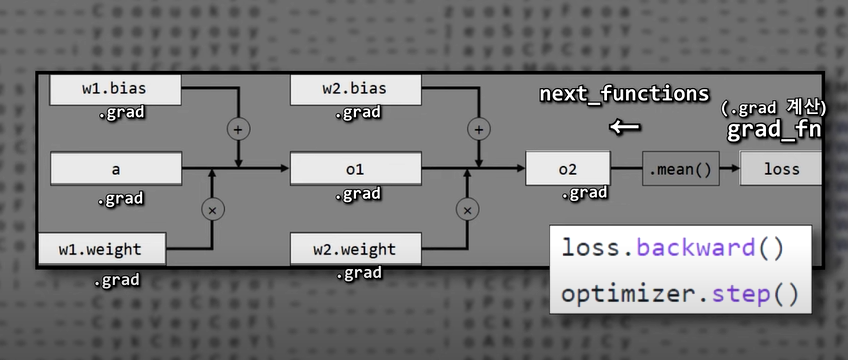

- 이 과정을 통해 gradient 값을 순차적으로 얻는다 